## PREDICTION OF CUSTOMER TURNOVER

### PROJECT OVERVIEW
The project aims to develop a predictive model to forecast  on customer turnover and reduce the  monetary losses.

### INTRODUCTION:
SyriaTel is a leading telecommunications company that provides a wide range of services to its customers.
Established with a commitment to delivering high-quality communication solutions, it has become a prominent
player in the telecommunications industry. The company's headquarters are strategically located, and it operates in
various regions, offering both mobile and fixed-line services.Syriatel faces the challenges of enhancing and evolving its services and providing excellent customer experiences as the competition grows in the rapidly changing market.

The project aims to develop a predictive model to forecast customer churn. Customer churn poses challenges for telecom companies. The predictive model will empower SyriaTel to identify customers at risk of churning in advance, enabling proactive retention strategies.

In the pursuit of predicting customer churn for SyriaTel, various stakeholders within the telecommunications company stand to benefit from the implementation of a successful predictive model. Each stakeholder plays a unique role in utilizing the project outcomes to address customer retention challenges and enhance the overall business performance. Here, we identify key stakeholders and elucidate how they would leverage the project:

#### Key Stakeholders:


Marketing Teams:
Marketing teams can utilize churn predictions to design targeted campaigns and promotions aimed at retaining customers identified as at-risk. By tailoring strategies based on individual customer profiles, marketing teams can maximize the effectiveness of their efforts and minimize the impact of churn on customer segments.


Customer Service:
Customer service representatives can leverage churn predictions to prioritize and personalize interactions with customers identified as likely to churn. This enables proactive engagement to address customer concerns, resolve issues, and provide tailored solutions, ultimately improving customer satisfaction and loyalty.

Management:
The management team can make strategic decisions informed by the insights derived from the predictive model. By understanding the factors influencing churn, management can allocate resources effectively, set retention targets, and monitor the overall impact on business performance.





### BUSINESS PROBLEM

The problem at hand is predicting customer churn for SyriaTel, a telecommunications company.Customer churn refers to the phenomenon where customers cease their relationship with a company, and in this context,it implies customers discontinuing their services with SyriaTel. The goal is to build a predictive model that can forecast whether a customer is likely to churn in the near future.

### Objective:

1.Predict Customer Churn:

Develop a predictive model to identify customers who are at risk of churning from SyriaTel's services.identifying potential churners in advance, Enables early intervention strategies, allowing SyriaTel to take proactive measures to retain these customers as well as customer satisification.

2.Identify key features that predict Churn:

By understanding which factors contribute most significantly to churn, SyriaTel can focus its retention efforts on addressing these specific aspects.

3.Improve Customer Satisfaction:

Enhance overall customer satisfaction by addressing concerns and preferences identified through the predictive model,
creating a more personalized and customer-centric experience.

4.Strategic Decision-Making:

Provide actionable insights to management for strategic decision-making, allowing them to allocate resources effectively and make informed business decisions related to customer retention.




### DATA UNDERSTANDING 

Data Sources:

The dataset used for predicting customer churn for SyriaTel is sourced internally from SyriaTel's customer records.
It includes historical data on customer interactions, service usage, and account details. The dataset spans a defined
timeframe, capturing a diverse range of customer behaviors and experiences.

Relevance to Problem:

The data are highly suitable for the project as they directly pertain to customer interactions and behaviors. This includes information on call duration, data usage, contract details, customer support interactions, and other relevant features that can influence customer churn.

Dataset Size: The dataset comprises 3,333  client (rows) and 21 features (columns).

#### Columns Descriptions

Churn: Indicates if the customer has stopped doing business with SyriaTel. (False = No churn, True = Churned)

State: The U.S. State of the customer. (Requires one-hot encoding; not ordinal)

Account Length: A smaller number signifies an older account. (Indicative of Customer Lifetime Value)

Area Code: Area code of the customer's phone number.

Phone Number: The customer's phone number.

International Plan: Whether the customer has an international plan. ('yes' or 'no'; binary and thus effectively one-hot encoded)

Voice Mail Plan: Whether the customer subscribes to a voice mail plan. ('yes' or 'no'; as above)

Number of Voice Mail Messages: Total number of voice mail messages left by the customer.

Total Day Minutes: Aggregate of daytime minutes used.

Total Day Calls: Total number of calls made during the day.

Total Day Charge: Total charges incurred for daytime calls.

Total Eve Minutes: Total minutes spent on calls in the evening.

Total Eve Calls: Number of calls made during the evening.

Total Eve Charge: Charges for evening calls.

Total Night Minutes: Total minutes for nighttime calls.

Total Night Calls: Number of calls made at night.

Total Night Charge: Nighttime call charges.

Total Intl Minutes: Cumulative international minutes (covering day, evening, and night).

Total Intl Calls: Total number of international calls (across all time periods).

Total Intl Charge: Total charges for international calls.

Customer Service Calls: Number of calls made to customer service by the customer.


#### Target Variable Desription:

Churn: if the customer has churned (true or false)

### DATA PREPARATION

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from xgboost import XGBClassifier

In [2]:
#loading the data in a dataframe
df = pd.read_csv('churn dataset.csv')
#viewing the first 10
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [3]:
# Gettting information of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Checking the dimensions
df.shape

(3333, 21)

In [5]:
# checking for missing values

df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# Understanding the dependent variable
print("Value count",df["churn"].value_counts())

# Normalizing the churn column
("The normalized value count",df["churn"].value_counts(normalize=True))

Value count False    2850
True      483
Name: churn, dtype: int64


('The normalized value count',
 False    0.855086
 True     0.144914
 Name: churn, dtype: float64)

In the context of building a predictive model, understanding the distribution of the target variable is crucial, as it has implications for model evaluation and interpretation.

In [7]:
# Modifying the names of th columns
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [8]:
# understanding the description of the data
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## DATA PREPARATION

In [10]:
df["area_code"].value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

In [11]:
df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
KS     70
MD     70
NC     68
NJ     68
MT     68
CO     66
WA     66
NV     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
DE     61
OK     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [12]:
df['account_length'].value_counts()

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account_length, Length: 212, dtype: int64

In [13]:
df['international_plan'].value_counts()

no     3010
yes     323
Name: international_plan, dtype: int64

In [14]:
df['voice_mail_plan'].value_counts()

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

In [15]:
df["phone_number"].value_counts()

354-1558    1
395-6002    1
410-5455    1
417-4309    1
357-3817    1
           ..
373-9108    1
373-7690    1
385-2564    1
406-2752    1
413-6769    1
Name: phone_number, Length: 3333, dtype: int64

In [16]:
df["phone_number"].unique

<bound method Series.unique of 0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone_number, Length: 3333, dtype: object>

In [17]:
# Making the phone number be the index
df["phone_number"]=df["phone_number"].str.replace("-","").astype(int)
df.set_index("phone_number",inplace=True)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
phone_number,,,,,,,,,,,,,,,,,,,,
3824657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
3717191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3581921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3759999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
3306626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
#Separating the numerical and the categorical variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns  

# removing area code from the numerical variables
numerical_features = [col for col in numerical_features if col != 'area_code']

# adding 'area code' into the categorical variables
cat_features = list(df.select_dtypes(include=['object', 'bool']).columns )+ ['area_code']



print("numerical features :",numerical_features)
print("")
print("cat_features features :",cat_features)

numerical features : ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

cat_features features : ['state', 'international_plan', 'voice_mail_plan', 'churn', 'area_code']


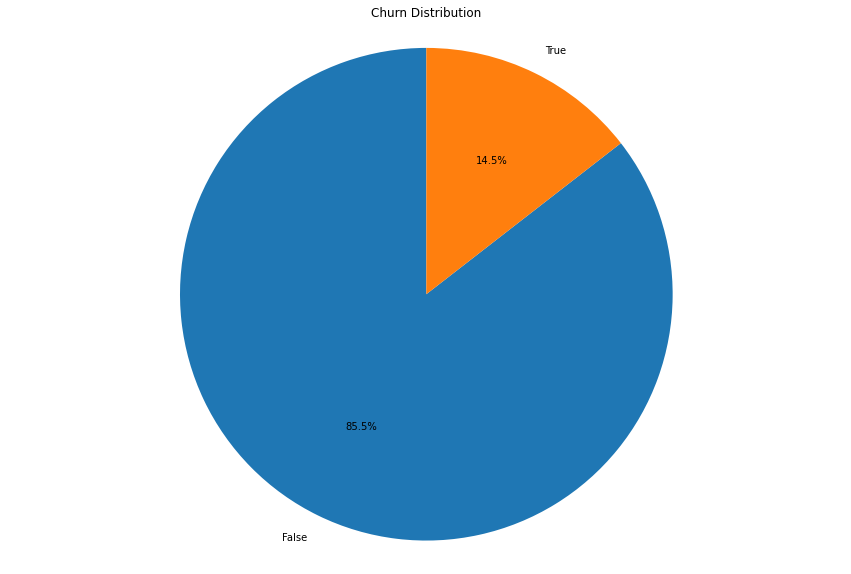

In [19]:


# representing the same using a Pie Chart to visualize the percentages
churn_counts = df['churn'].value_counts()

# Create a new figure with a larger size
plt.figure(figsize=(15, 10))

# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Distribution of the target variable

The target variable appears to be imbalanced, with the majority class being False (no churn) and the minority class being
True (churn). Imbalanced datasets can pose challenges for machine learning models, especially when using accuracy as the 
evaluation metric. If the model predicts the majority class for all instances, it could still achieve a high accuracy simply by correctly predicting the more frequent class

Distribution of Independent Variables

Categorical Attributes

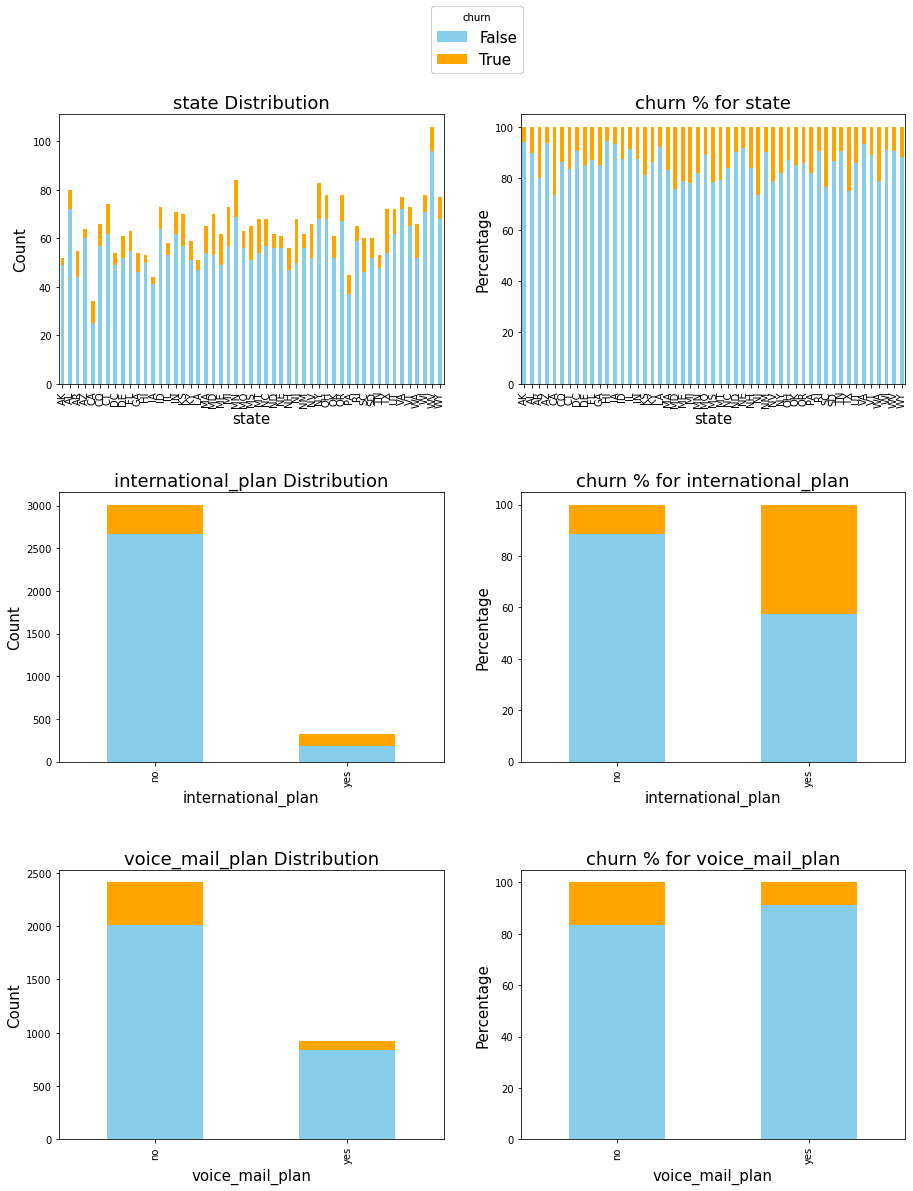

In [20]:
# Examine the relationship between the categorical attributes and churn rate using stacked bar charts
cat = df.dtypes[df.dtypes=='object'].index

# Configure subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
plt.subplots_adjust(left=0.06, right=0.9, bottom=0.01, top=0.9, wspace=0.2, hspace=0.4)

for x in range(len(cat)):
    group = df.groupby([cat[x], 'churn']).size().unstack()
    churn_percent = group.T/group.T.sum()*100

    ax = group.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=axes[x, 0], legend=None)
    ax.set_title('{} Distribution'.format(cat[x]), fontsize=18)
    ax.set_xlabel(xlabel=cat[x], fontsize=15)
    ax.set_ylabel(ylabel='Count', fontsize=15)

    ax = churn_percent.T.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=axes[x, 1], legend=None)
    ax.set_title('churn % for {}'.format(cat[x]), fontsize=18)
    ax.set_xlabel(xlabel=cat[x], fontsize=15)
    ax.set_ylabel(ylabel='Percentage', fontsize=15)

    fig.legend(['False', 'True'], title='churn', bbox_to_anchor=(0.528, 1.00), fontsize=15)

In [21]:
# state and areacode give the same info
df=df.drop("state",axis=1)

Distribution of the Numerical Attributes

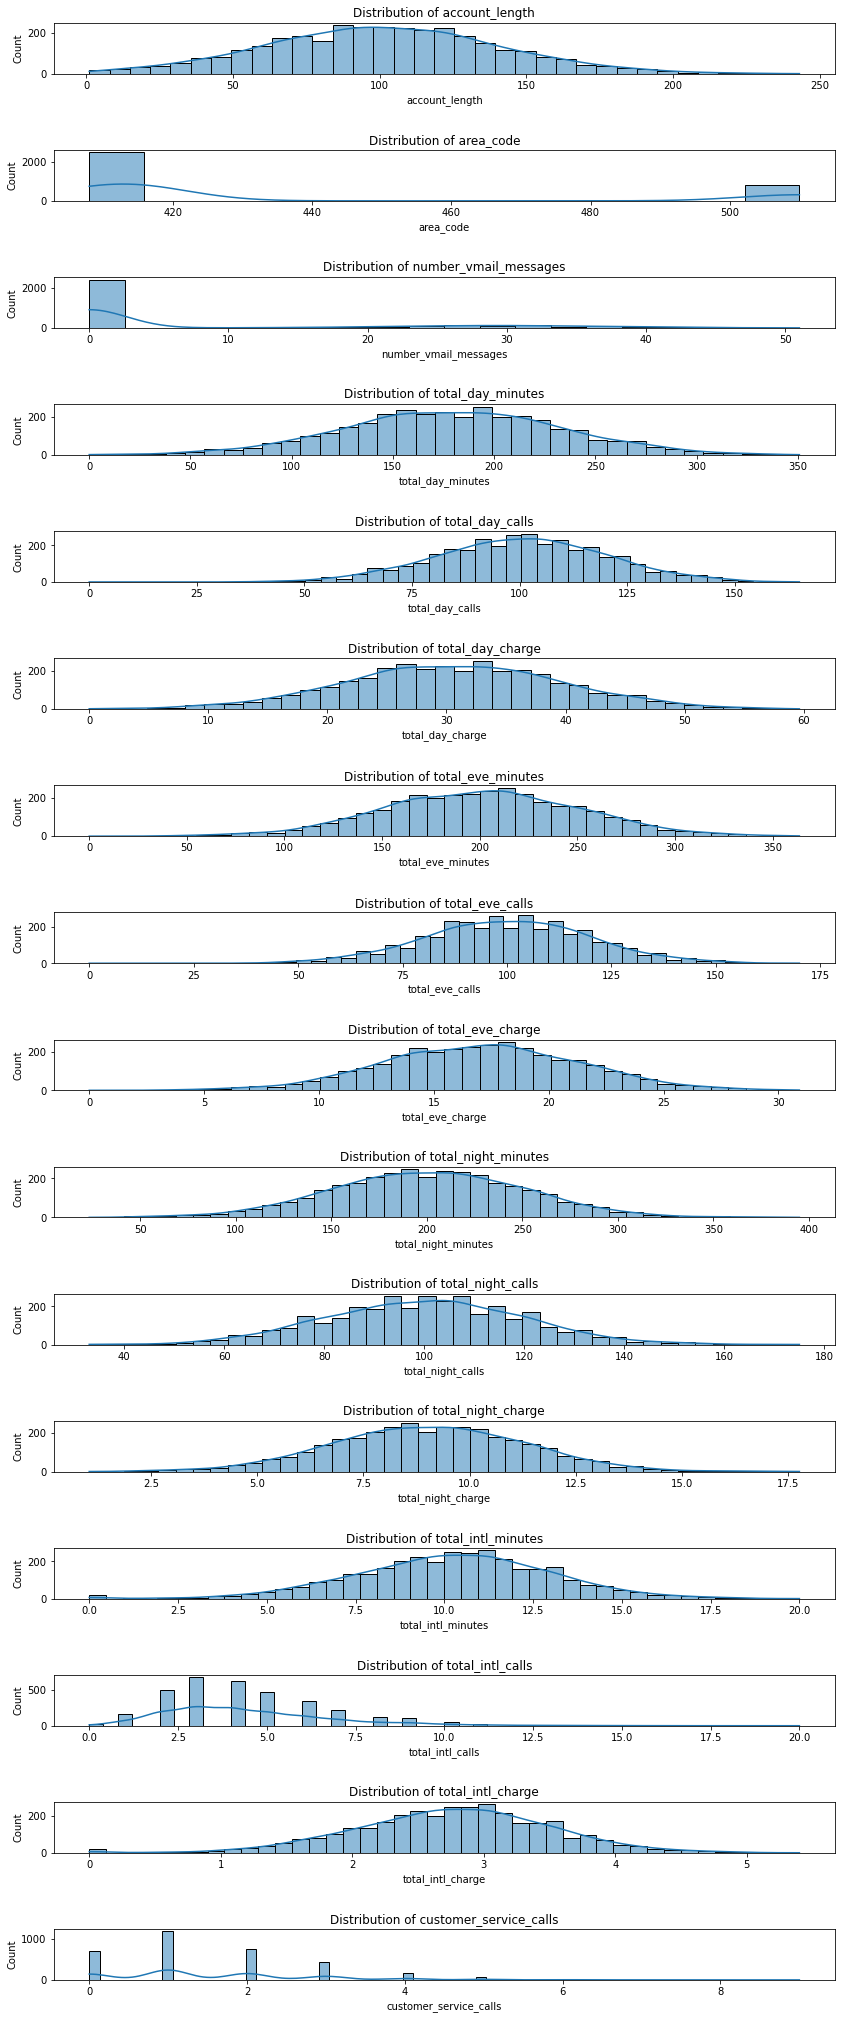

In [22]:
# examine the distribution of numerical attributes

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = [col for col in numerical_features if col != 'area code']

# Set up subplots for numerical features
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(14, 36))
plt.subplots_adjust(hspace=1.5)  # Increase the vertical space between subplots

# Plot distribution for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Display the plot without blocking the notebook execution
plt.show(block=False)


### One- Hot Encoding and Label Encoding

In [23]:
#convert churn values to integer 1s and 0s
df['churn'] = df['churn'].astype(int)

#convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area_code', 'international_plan', 'voice_mail_plan'],drop_first=True)
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes
phone_number,,,,,,,,,,,,,,,,,,,,
3824657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
3717191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
3581921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,0,0
3759999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0
3306626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0,1,0


## Creating a Predictive Model

In [24]:
# defining X and y

X=df.drop("churn",axis=1)
y=df["churn"]

#splitting into training and testing set 80/20
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=111)


print("No. in X_train:",(len(X_train)))
print("No. in X_test:",(len(X_test)))

print("No. in y_train:",(len(y_train)))
print("No. in y_test:",(len(y_test)))


No. in X_train: 2666
No. in X_test: 667
No. in y_train: 2666
No. in y_test: 667


### SMOTE Technique to Address Class Imbalance in the 'churn' Feature

In [25]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=111,sampling_strategy="auto")
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)


print(y_train_resampled.value_counts())

1    2277
0    2277
Name: churn, dtype: int64


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, plot_confusion_matrix, plot_roc_curve
#creating a function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate the performance of a classification model on both training and testing sets.
    
    Parameters:
    - model (object): The trained classification model.
    - X_train (array-like): Features of the training set.
    - y_train (array-like): Target labels of the training set.
    - X_test (array-like): Features of the testing set.
    - y_test (array-like): Target labels of the testing set.
    
    Returns:
    - None
    Prints:
    - Testing set classification metrics (Accuracy, Recall, Precision, F1 Score).
    - Testing set classification report.
    - Confusion matrix for the testing set.
    - ROC curves for both training and testing sets.
    - Accuracy comparison between training and testing sets.
    
    Plots:
    - Confusion matrix for the testing set.
    - ROC curves for both training and testing sets.
    - Bar chart comparing accuracy between training and testing sets.
    """


    fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # Create subplots

    
    # Testing set evaluation
    y_test_pred = model.predict(X_test)
    
    # Print testing set classification metrics
    print("Testing Set Metrics:")
    print(f'Accuracy: {round(accuracy_score(y_test, y_test_pred), 2)}')
    print(f'Recall: {round(recall_score(y_test, y_test_pred), 2)}')
    print(f'Precision: {round(precision_score(y_test, y_test_pred), 2)}')
    print(f'F1 Score: {round(f1_score(y_test, y_test_pred), 2)}')
    
    # Print testing set classification report
    print('\nTesting Set Classification Report:')
    print(classification_report(y_test, y_test_pred))
    
    # Plot testing set confusion matrix
    plot_confusion_matrix(model, X_test, y_test, cmap="Blues", ax=axes[0])
    axes[0].set_title('Testing Set Confusion Matrix')
    
    # Plot ROC curve for both training and testing sets
    plot_roc_curve(model, X_train, y_train, ax=axes[1], name='Training Set ROC Curve')
    plot_roc_curve(model, X_test, y_test, ax=axes[1], name='Testing Set ROC Curve')
    axes[1].plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Add a diagonal line for reference
    axes[1].set_title('ROC Curves')
    
    # Compare accuracy scores of training and testing sets
    training_accuracy = accuracy_score(y_train, model.predict(X_train))
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    
    print('\nAccuracy Comparison:')
    print(f'Training Set Accuracy: {round(training_accuracy, 3)}')
    print(f'Testing Set Accuracy: {round(testing_accuracy, 3)}')
    
    # Plot bar chart for accuracy comparison
    axes[2].bar(['Training Set', 'Testing Set'], [training_accuracy, testing_accuracy], color=['blue', 'orange'])
    axes[2].set_title('Accuracy Comparison')
    axes[2].set_ylabel('Accuracy')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()



### Baseline (Dummy model)

In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix, plot_roc_curve


dummy_model=DummyClassifier(strategy="most_frequent",random_state=111)
# Train the dummy model

dummy_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
dummy_predictions = dummy_model.predict(X_test)


# Evaluate the performance of the dummy model
accuracy = accuracy_score(y_test, dummy_predictions)
print(f"Accuracy of Dummy Model: {accuracy:.2f}")

# Print classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, dummy_predictions))

Accuracy of Dummy Model: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       573
           1       0.00      0.00      0.00        94

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667



c:\Users\wambu\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


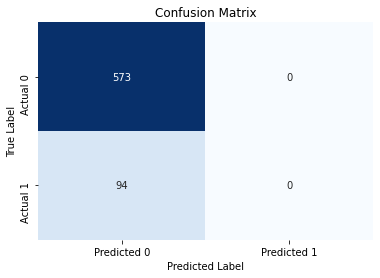

In [28]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, dummy_predictions)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

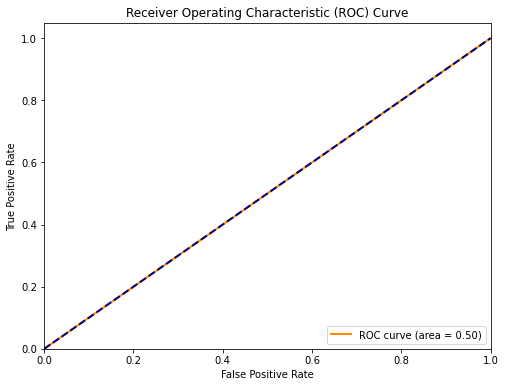

In [29]:
from sklearn.metrics import roc_curve, auc

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dummy_predictions)

# Calculating the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The accuracy of the dummy model is 0.86, meaning it correctly predicted the target variable in 86% of the cases.This is 
majorly due to the model predicting False for all cases.The model is having a problem predicting the churn which is caused by the imbalance in the dataset.

The area under the curve is 0.5 indicating that the model can not differentiate between True and False classes.This means that the model performs no better than random chance.

We'll use the dummy as baseline to improve on it and build better and more advanced models to predict churn.


### Logistic Regression Model

Testing Set Metrics:
Accuracy: 0.77
Recall: 0.69
Precision: 0.34
F1 Score: 0.46

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       573
           1       0.34      0.69      0.46        94

    accuracy                           0.77       667
   macro avg       0.64      0.74      0.66       667
weighted avg       0.86      0.77      0.80       667


Accuracy Comparison:
Training Set Accuracy: 0.773
Testing Set Accuracy: 0.771


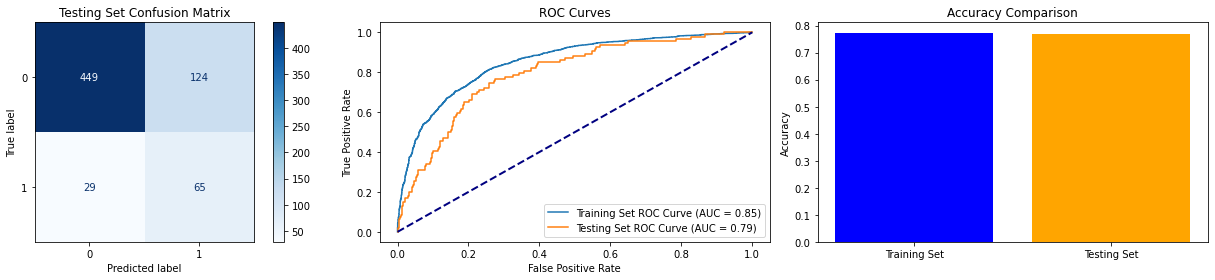

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#instantiate the model
logreg_model = LogisticRegression(random_state=111)
#creating the model pipeline
model_pipe = Pipeline([("ss",StandardScaler()),
                    ("logreg",logreg_model)])

#fitting of the model
model_pipe.fit(X_train_resampled,y_train_resampled)

#training the model
logisitc_y_trn_pred=model_pipe.predict(X_train_resampled)

logistic_y_preds = model_pipe.predict(X_test)
#testing and evaluating
evaluate_model(model_pipe,X_train_resampled,y_train_resampled,X_test,y_test)

In [31]:

from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model_pipe
                            , X_train_resampled, y_train_resampled, cv=5)

# Print CV summary
print('CV Scores for Logistic Regression model:')
print(f'Accuracy scores: {cv_scores}')
print(f'Average accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


CV Scores for Logistic Regression model:
Accuracy scores: [0.67178924 0.79582876 0.7870472  0.77607025 0.79010989]
Average accuracy: 0.7642 ± 0.0466


### Interpretation of the model

Accuracy: 
    
The model has an accuracy of 0.77.This means the model correctly predicts whether a customer is Churning 77%  of the cases.

Recall:
    
The model has 0.69.This means the model actually identifies about 69% of  churning customers.This can be improved on 
to capture more churning customers.

precision:
    
The model has a precision of 0.34.This means when the model predicts a customer churining its correct 34% of cases.This needs
to be improved on as well.

F1 score:
    
The model has an f1 score of 0.46.F1 score considers both precision and recall, providing a balanced measure of a model's
performance, particularly in scenarios where there is an imbalance between the classes


Roc_curve:
Training set auc curve (0.85) means that high ability to distinguish between True and False indicating balance between sensitivity and specificity.This is better than the previous model with (0.5)
Testing set auc curve (0.79) indicates the the model does well on unseen data .

Accuracy Comparison:
Training Set Accuracy: (0.77), Testing Set Accuracy: (0.77).The fact that the accuracy is similar between the training and testing sets (both at 0.77) suggests that the model is generalizing reasonably well. It implies that the model's performance on the unseen testing data is consistent with its performance on the data it was trained on

The average accuracy across all folds is calculated to be approximately 76.42%. This gives you an overall estimate of how well the model is expected to perform on new, unseen data.

### Conclusion

The logistics regression is an improvement of the previous baseline model in that the model is now able to distinguish 
between the classes.it shows good potential to predict churn. However futher tuning of the model could increase the model's predictive abilities.Further exploration
of other models is also useful in order to minimise errors(false positives) and increase the correct classification(recall) . 

Next we try to look at non-parametric models 

### Decision Trees Model


Testing Set Metrics:
Accuracy: 0.85
Recall: 0.76
Precision: 0.47
F1 Score: 0.58

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       573
           1       0.47      0.76      0.58        94

    accuracy                           0.85       667
   macro avg       0.71      0.81      0.74       667
weighted avg       0.89      0.85      0.86       667


Accuracy Comparison:
Training Set Accuracy: 1.0
Testing Set Accuracy: 0.846


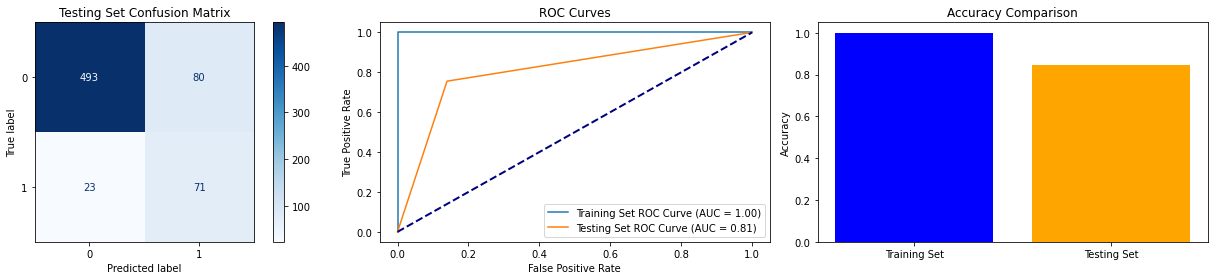

In [32]:
from sklearn.tree import DecisionTreeClassifier
#instantiate the Model
dt = DecisionTreeClassifier(random_state=111)
#fitting of the model
dt.fit(X_train_resampled,y_train_resampled)

#predicting and evaluating the model
y_preds=dt.predict(X_test)

evaluate_model(dt,X_train_resampled,y_train_resampled,X_test,y_test)

Interpretation of the model
Accuracy:

The model has an accuracy of 0.85.This means the model correctly predicts whether a customer is Churning 85% of the cases.

Recall:

The model has 0.76.This means the model actually identifies about 76% of churning customers.
precision:

The model has a precision of 0.47.This means when the model predicts a customer churining its correct 47% of cases.

F1 score:

The model has an f1 score of 0.58.There is an improvement from the logistics model

Confusion Matrix:

The confusion matrix shows a total of 667 samples in the test set.

True Positives (TP): The model correctly predicted 71 samples as churned (class 1).

True Negatives (TN): The model correctly predicted 493 samples as Not churned (class 0).

False Positives (FP): The model incorrectly predicted 80 samples as churned when they were not churned.

False Negatives (FN): The model incorrectly predicted 23 samples as not churned when they were churned.

Roc_curve: Training set auc curve (1.0) means that model is overfitting and futher tuning could be applied.
    
Accuracy Comparison: Training Set Accuracy: (1.0), Testing Set Accuracy: (0.85).This is an indication that the model is overfitting due to the imbalance in class .

#### conclusion

The Decision Tree model has improved on the accuracy of the model to 85%.The recall , precision and f1 score have all improved as well.
We'll be doing hyperparameter tuning to enhance the predicting ability of the model .


### Decision Tree Pruning
here well use GridSearch to find the best parameters for tuning the model

In [33]:
from sklearn.model_selection import GridSearchCV

#instantiate the model
dt = DecisionTreeClassifier(random_state=111)
#introducing the pipeline
dt_pipeline = Pipeline([('decision_tree', dt)])

# Define the grid for hyperparameter tuning
param_grid = {
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__max_depth': [2, 3, 5, 6,10,12],
    'decision_tree__min_samples_split': [2, 5,6, 10]
}
# Create and fit GridSearchCV
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Training Accuracy: {grid_search.best_score_ :.2%}")
print(f"Testing Accuracy: {grid_search.score(X_test,y_test):.2%}")
print("")
print("Best Parameter Combination Found During Grid Search:")
grid_search.best_params_




Training Accuracy: 85.44%
Testing Accuracy: 87.56%

Best Parameter Combination Found During Grid Search:


{'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': 12,
 'decision_tree__min_samples_split': 2}

The training accuracy after hyperparameter tuning is 85.44%, suggesting an improvement from the untuned mode.
The test accuracy has improved a little bit(87.56%) indicating that the model generalizes well to unseen data.


### Tuned Decision Tree

Testing Set Metrics:
Accuracy: 0.88
Recall: 0.76
Precision: 0.54
F1 Score: 0.63

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       573
           1       0.54      0.76      0.63        94

    accuracy                           0.88       667
   macro avg       0.75      0.83      0.78       667
weighted avg       0.90      0.88      0.88       667


Accuracy Comparison:
Training Set Accuracy: 0.941
Testing Set Accuracy: 0.876


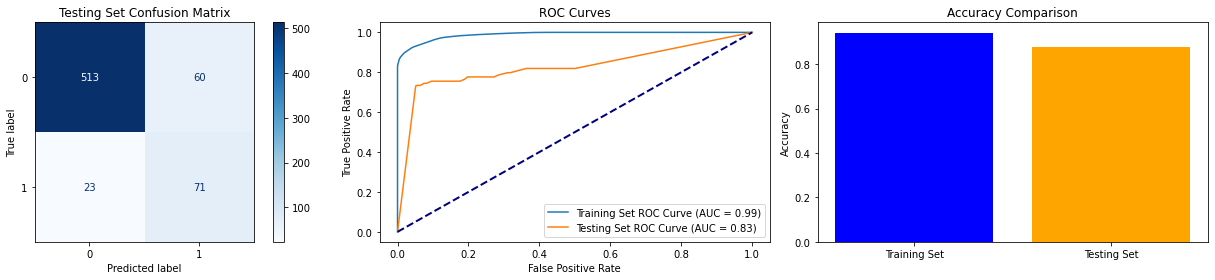

In [34]:
### applying the parameters

best_params= grid_search.best_params_
#intiating the model
dt = DecisionTreeClassifier(
    random_state=111,
    criterion=best_params['decision_tree__criterion'],
    max_depth=best_params['decision_tree__max_depth'],
    min_samples_split=best_params['decision_tree__min_samples_split']
)
#fitting the model
dt.fit(X_train_resampled,y_train_resampled)
#testing and evaluating the model
evaluate_model(dt,X_train_resampled,y_train_resampled,X_test,y_test)

### Interpretation of the model

Accuracy: 
    
The model has an accuracy of 0.876.This means the model correctly predicts whether a customer is Churning 87.6%  of the cases.

Recall:
    
The model has 0.76.This means the model actually identifies about 76% of  churning customers.This can be improved on
to capture more churning customers.

precision:
    
The model has a precision of 0.54.This means when the model predicts a customer churining its correct 54% of cases.This needs
to be improved on as well.

F1 score:
    
The model has an f1 score of 0.63.F1 score considers both precision and recall, providing a balanced measure of a model's
performance, particularly in scenarios where there is an imbalance between the classes


Roc_curve:
Training set auc curve (0.99) means that low ability to distinguish between True and False indicating imbalance between sensitivity and specificity.
Testing set auc curve (0.83) indicates the the model does well on unseen data .
The difference in the curve indicates overfitting.

Accuracy Comparison:
Training Set Accuracy: (0.941), Testing Set Accuracy: (0.876).this suggest that there is overfitting even after tuning the parameters.
        

### conclusion


The tuned Decision Tree model has an improvement on the test set with an accuracy of 87.6 % and auc of 0.83, however the model
still shows overfitting due to the high auc on training score.This needs futher optimization of the model or trying different 
models.

## Ensemble Methods

### Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Instatiating a Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=111)

mean_rf_cv_score = np.mean(cross_val_score(random_forest_model, X_test, y_test, cv=3))

print(
    f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}"
)



Mean Cross Validation Score for Random Forest Classifier: 89.80%


The Random Forest Classifier, when trained on the training data and evaluated through cross-validation, achieves an average accuracy of 89.80%. This indicates that the model is generally effective in correctly predicting the target variable across different subsets of the training data.
There is an increase in both test and train accuracy using the untuned Random Forest search.This shows room for improvement by optimizing the parameters.
We'll use GridSearch from sklearn library to find the best parameters below


Training Accuracy: 91.48%
Testing Accuracy:92.20%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
Testing Set Metrics:
Accuracy: 0.92
Recall: 0.65
Precision: 0.76
F1 Score: 0.7

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       573
           1       0.76      0.65      0.70        94

    accuracy                           0.92       667
   macro avg       0.85      0.81      0.83       667
weighted avg       0.92      0.92      0.92       667


Accuracy Comparison:
Training Set Accuracy: 0.995
Testing Set Accuracy: 0.922


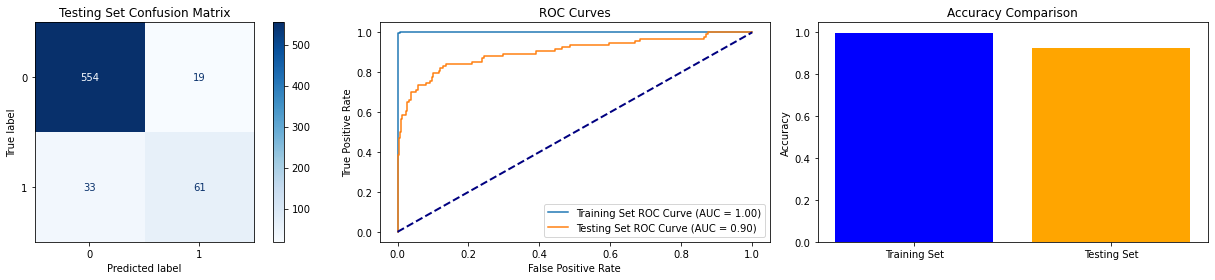

In [36]:
#finding the parameters
rf_param_grid = {
    "n_estimators": [10, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 6, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 6],
}

#instantiating the Gridsearch
rf_grid_search=GridSearchCV(random_forest_model, rf_param_grid, cv=3)

rf_grid_search.fit(X_train_resampled,y_train_resampled)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print(f"Testing Accuracy:{ rf_grid_search.score(X_test,y_test):.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")
#evaluation
evaluate_model(rf_grid_search,X_train_resampled,y_train_resampled,X_test,y_test)

There is an improvement in the test accuracy from 89.8% from the previous model to 91.48% on Training set.This shows potential for the tuned random forest model,but before we tune the model we'll look at other models and pick the best performing model according to our business goals.

XGB Classifer

Testing Set Metrics:
Accuracy: 0.93
Recall: 0.72
Precision: 0.76
F1 Score: 0.74

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       573
           1       0.76      0.72      0.74        94

    accuracy                           0.93       667
   macro avg       0.86      0.84      0.85       667
weighted avg       0.93      0.93      0.93       667


Accuracy Comparison:
Training Set Accuracy: 1.0
Testing Set Accuracy: 0.93


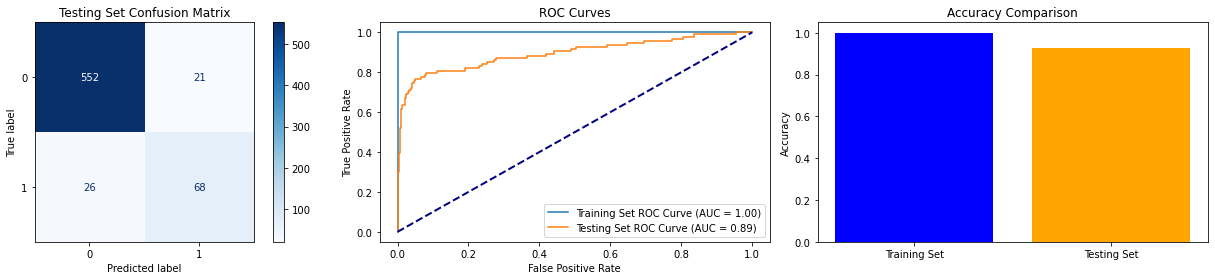

In [37]:
# Instantiating the XGBClassifier
XGB = XGBClassifier(random_state=111)
# Fit XGBClassifier
XGB.fit(X_train_resampled, y_train_resampled)
#test and evaluate
evaluate_model(XGB,X_train_resampled,y_train_resampled,X_test,y_test)

A training accuracy of 100.0% indicates that the model has perfectly predicted the labels on the training data. While this might sound impressive, it could also be a sign of overfitting, where the model has essentially memorized the training data and might not generalize well to new, unseen data
a validation accuracy of 92.95% suggests that the model performs well on unseen data, and it's a positive sign.

Next we optimize the model by tuning the parameters.


In [38]:
### finding the best params

# Define parameter grid for tuning
xgb_param_grid = {
    'learning_rate': [0.1, 0.2], 
    'max_depth': [3, 4],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.5, 0.7, 0.8],
    'n_estimators': [100]
}




xgb_grid_search=GridSearchCV(XGB, xgb_param_grid, cv=3)

xgb_grid_search.fit(X_train_resampled,y_train_resampled)

print(f"Training Accuracy: {xgb_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {xgb_grid_search.best_params_}")

Training Accuracy: 91.39%

Optimal Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}


### Tuning XGBClassifier Model

Testing Set Metrics:
Accuracy: 0.92
Recall: 0.73
Precision: 0.73
F1 Score: 0.73

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       573
           1       0.73      0.73      0.73        94

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667


Accuracy Comparison:
Training Set Accuracy: 0.971
Testing Set Accuracy: 0.924


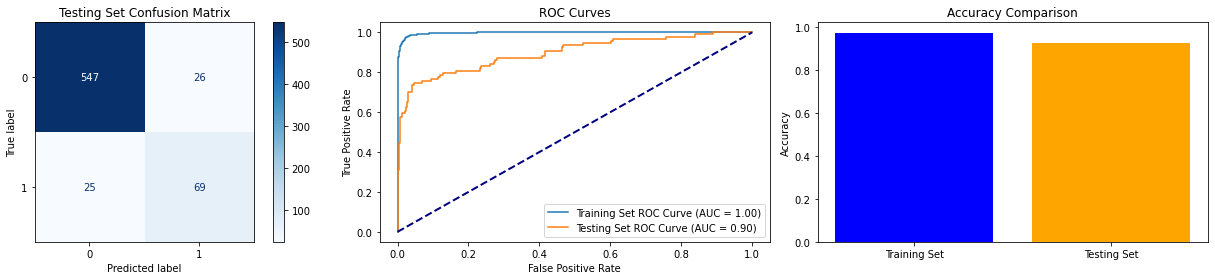

In [39]:
best_params= xgb_grid_search.best_params_

XGB = XGBClassifier(
    random_state=111,
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    n_estimators=best_params['n_estimators']
    
)
#fitting the model
XGB.fit(X_train_resampled,y_train_resampled)

evaluate_model(XGB,X_train_resampled,y_train_resampled,X_test,y_test)

MODEL COMPARISIONS

In [40]:
class ModelSelector:
    """
    A class for selecting the best model among a set of models based on accuracy,recall,precision,f1score and roc
    evaluation metrics.

    Parameters:
    - models (dict): Dictionary containing model names as keys and corresponding model instances as values.
    - X (array-like): Feature matrix.
    - y (array-like): Target variable.
    - scoring (str): The evaluation metric to use. Supported metrics: 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'.
    - cv (int or cross-validation generator): Number of folds or cross-validation generator for StratifiedKFold.

    Methods:
    - fit(): Fit models using cross-validation and select the best model based on the specified metric.
    - get_best_model(): Get the name of the best model.
    - get_best_score(): Get the score of the best model.

  
    """

    def __init__(self, models, X, y, scoring='accuracy', cv=5):
        """
        Initialize the ModelSelector instance.

        Parameters:
        - models (dict): Dictionary containing model names as keys and corresponding model instances as values.
        - X (array-like): Feature matrix.
        - y (array-like): Target variable.
        - scoring (str): The evaluation metric to use. Supported metrics: 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'.
        - cv (int or cross-validation generator): Number of folds or cross-validation generator for StratifiedKFold.
        """
        self.models = models
        self.X = X
        self.y = y
        self.scoring = scoring
        self.cv = cv
        self.best_model = None
        self.best_score = None

    def fit(self):
        """
        Fit models using cross-validation and select the best model based on the specified metric.
        """
        best_score = 0
        best_model = None

        # Using stratified k-fold cross-validation
        kf = StratifiedKFold(n_splits=self.cv, shuffle=True, random_state=42)

        for model_name, model in self.models.items():
            if self.scoring == 'accuracy':
                scores = cross_val_score(model, self.X, self.y, cv=kf, scoring='accuracy')
            elif self.scoring == 'precision':
                scores = cross_val_score(model, self.X, self.y, cv=kf, scoring='precision')
            elif self.scoring == 'recall':
                scores = cross_val_score(model, self.X, self.y, cv=kf, scoring='recall')
            elif self.scoring == 'f1':
                scores = cross_val_score(model, self.X, self.y, cv=kf, scoring='f1')
            elif self.scoring == 'roc_auc':
                scores = cross_val_score(model, self.X, self.y, cv=kf, scoring='roc_auc')

            # Calculating the mean score
            mean_score = scores.mean()

            if mean_score > best_score:
                best_score = mean_score
                best_model = model_name

        self.best_model = best_model
        self.best_score = best_score

    def get_best_model(self):
        """
        Get the name of the best model.
        """
        return self.best_model

    def get_best_score(self):
        """
        Get the score of the best model.
        """
        return self.best_score


In [41]:
#creating a dict of all the models
testing_models = {
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        'XGBClassifier': XGBClassifier()

}    
#instantiating the models
tester=ModelSelector(testing_models, X_train, y_train, scoring='accuracy')
#fitting the models
tester.fit()
#comparing the models to get the best    
best_performing_model=tester.get_best_model()
best_score = tester.get_best_score()

print(f'Best Model: {best_performing_model}')
print(f'Best Score ({tester.scoring}): {best_score}')

Best Model: XGBClassifier
Best Score (accuracy): 0.9553653617780775


"Best Model: XGBClassifier" indicates that the XGBoost Classifier performed the best among the models tested. XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm known for its efficiency and high performance.

The "Best Score (accuracy): 0.9553653617780775" suggests that the accuracy achieved by the XGBoost model on   is approximately 95.54%.

EVALUATION OF THE  FINAL MODEL

Interpretation of the  XGB model
Accuracy:

The accuracy of 92.4% implies that the model correctly predicts whether a customer is churning in the majority of cases.

Recall:

The recall of 73.4% indicates that the model effectively identifies approximately 73.4%precision:

The precision of 72.6% signifies that when the model predicts a customer as churning, it is correct around 72.6% of the time

F1 score:

The F1 score of 0.73, which combines precision and recall, also reflects a well-balanced performance.

Confusion Matrix:

The confusion matrix shows a total of 667 samples in the test set.

True Positives (TP): The model correctly predicted 69 samples as churned (class 1).

True Negatives (TN): The model correctly predicted 547 samples as Not churned (class 0).

False Positives (FP): The model incorrectly predicted 26 samples as churned when they were not churned.

False Negatives (FN): The model incorrectly predicted 25 samples as not churned when they were churned.

Roc_curve: Training set auc curve (1.0), 100.0% indicates that the model has perfectly predicted the labels on the training data
    
Roc_curve: Testing set auc curve (0.9) indicates the the model does well on unseen data .There is a slight improvement of 0.1 %
    from the previous model.
    

Accuracy Comparison: Training Set Accuracy: (0.971), Testing Set Accuracy: (0.924).the small difference between the training and testing set indicates that there is no overfitting and the model works generally well on unseen data.

#### conclusion

Analyzing the confusion matrix, it is noted that the model has a relatively low number of false positives (26) and false negatives (25), indicating a reasonable balance between Type I and Type II errors.The ROC curve analysis further supports the model's effectiveness, with both the training and testing set AUC curves showcasing strong predictive capabilities.The high auc for the training data suggest that there might be overfitting even after tuning the model.

In conclusion, considering the high accuracy, precision, recall, and F1 score, as well as the positive ROC curve results and the absence of overfitting, it appears that this model is well-suited for predicting customer churn. The improvements seen in the testing set compared to the previous model suggest that the model is making progress. Therefore, based on these comprehensive evaluations,we'll be using this as our final model.


### Top  10 Features that help predict Churn


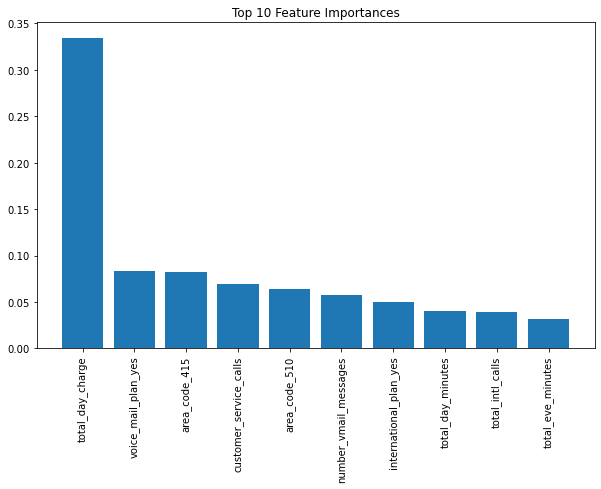

In [42]:
# Get feature importances from the trained model
feature_importances = XGB.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # replace with your feature names if applicable

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plotting the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importances[indices][:10])
plt.xticks(range(10), feature_names[indices][:10], rotation=90)
plt.title("Top 10 Feature Importances")
plt.show()

### Interpretation of features

Total Day Charge:

This feature represents the total charges for daytime usage. High values may suggest that customers who incur higher charges during the day might be more prone to churning.

Voice Mail Plan (Yes/No):

The presence of a voice mail plan could impact churn. Customers with a voice mail plan might have different behaviors compared to those without one.

Area Code 415 and Area Code 510:

These binary-encoded features may indicate the area code associated with the customer's phone number. Differences in churn rates across area codes could be inferred from these features.

Customer Service Calls:

The number of customer service calls could be a strong indicator of customer dissatisfaction or issues. Higher values might suggest higher chances of churn.

Number of Voicemail Messages:

The number of voicemail messages could be an indicator of engagement or communication patterns. Customers with more voicemail messages might have different churn behaviors.

International Plan (Yes/No):

Having an international plan might impact customer behavior. Customers with international plans may have different needs and usage patterns.

Total Day Minutes:

This feature likely represents the total number of minutes used during the day. Higher usage might correlate with higher charges and could be linked to churn.

Total International Calls:

The total number of international calls could be an important factor. Customers making more international calls might have different needs or usage patterns.

Total Evening Minutes:

Similar to total day minutes, this feature represents the total number of minutes used in the evening. Higher values might indicate more extensive usage and could correlate with churn.

Total International Minutes:

The total number of international minutes used might be important, especially for customers with international plans. Higher international usage could impact churn.

### Conclusion 

In conclusion, our thorough analysis of the customer churn prediction model has led us to confidently endorse the XGBoost (XGB) model as the most effective solution. The machine learning model, evaluated through key metrics such as accuracy, precision, recall, and F1 score, consistently demonstrates superior predictive capabilities. Noteworthy features influencing churn, including total day charge, customer service calls, and the presence of an international plan, were identified through feature importance analysis.

The XGBoost model exhibits robust performance on both training and testing sets, with a slight improvement in testing set accuracy compared to the previous model. The absence of overfitting further validates its generalizability to new data.

# Recommendations
Integration into Customer Management Systems: 

Collaborate with your IT department to seamlessly integrate the churn prediction model into your customer management systems. This ensures that the model is accessible and can be automatically applied to new data.

Manage Total Day Charges:

Insights: High total day charges correlate with higher churn rates.
Recommendation: Implement targeted pricing strategies, discounts, or loyalty programs to manage and reduce total day charges for customers at risk of churn.

Targeted Customer Service Improvement:

Insights: The number of customer service calls is a significant predictor of churn.
Recommendation: Invest in enhancing customer service quality and efficiency to address concerns promptly, reducing the need for repeated calls.
    
Review and Optimize International Plans:

Insights: The presence of an international plan influences churn.
Recommendation: Evaluate and optimize international plans, ensuring they align with customer needs. Consider personalized offerings or promotions for international services.
    
 
Enhance Voicemail Services:

Insights: The number of voicemail messages may impact churn.
Recommendation: Evaluate and enhance voicemail services, considering additional features or personalized messaging to increase customer engagement.
    
Area Code Analysis and Regional Strategies:

Insights: Area codes 415 and 510 may have varying churn rates.
Recommendation: Conduct a more detailed analysis of customer behaviors in different areas. Implement region-specific strategies or promotions to address localized concerns.
    
Customer Education on International Usage:

Insights: Total international calls and minutes influence churn.

Recommendation: Launch educational campaigns to inform customers about international plan benefits and usage tips. Proactively address concerns related to international calls.

Regular Model Updates and Monitoring:

Recommendation: Periodically update the predictive model based on new data to ensure its continued accuracy. Regularly monitor and adjust strategies based on changing customer behaviors and market trends.
    
Feedback Mechanism Implementation:

Recommendation: Establish a robust feedback mechanism to gather insights directly from customers. Utilize this feedback to iteratively improve services and address pain points.
    

### Summary

We analyzed a customer churn dataset, preprocessed the data, and trained a predictive model using machine learning techniques. The chosen model demonstrated high accuracy, precision, recall, and F1 score. Feature importance analysis highlighted the top 10 influential features, including total day charge, customer service calls, and the presence of an international plan. The model showed robust performance on both training and testing sets, indicating generalizability. In conclusion, the model is recommended for predicting customer churn, with insights suggesting specific factors contributing to customer attrition. Continuous monitoring and updates are advised for model maintenance and improvement.

### Pickling

In [43]:
import pickle


# Save the tuned XGBoost model to a file using pickle
with open('XGBoost_model.pkl', 'wb') as f:
    pickle.dump(XGB, f)


### Deployment

In [44]:
# Import necessary libraries
from flask import Flask, request, jsonify
import pickle
import pandas as pd

# Load the saved XGBoost model
with open('XGBoost_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Create a Flask app
app = Flask(__name__)

# Define a route for receiving predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the input data from the request
        data = request.get_json()

        # Assuming data is a dictionary containing feature values
        features = pd.DataFrame([data])

        # Make predictions using the loaded model
        prediction = model.predict(features)[0]

        # Return the prediction as JSON
        return jsonify({'prediction': int(prediction)})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(port=5000)

ModuleNotFoundError: No module named 'flask'